In [1]:
"""
Purpose: To compare the different distances of presyn coordinates
between the auto distribution and the manual distribution


"""

'\nPurpose: To compare the different distances of presyn coordinates\nbetween the auto distribution and the manual distribution\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [4]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-04 06:23:59,765 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:23:59,768 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:23:59,770 - settings - Setting database.password to newceliipass
INFO - 2021-03-04 06:23:59,775 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-04 06:23:59,777 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:23:59,793 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-04 06:24:00,167 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:24:00,171 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:24:00,173 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:24:00,174 - settings - Setting database.password to newceliipass
INFO - 2021-03-04 06:24:00,175 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:24:00,176 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:24:00,177 - settings - Setting database.password to newceliipass
INFO - 2021-03-04 06:24:00,180 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:24:00,632 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:24:00,672 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:24:00,674 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:24:00,675 - settings - Setting database.pa

In [5]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

In [6]:
import validation_utils as vu

# Getting the Distribution of the Presyn from the Auto Distribution

In [ ]:
minnie.Auto

In [8]:
auto_presyns = minnie.AutoProofreadSynapse3() & "skeletal_distance_to_soma>0" & "synapse_type='presyn'"
auto_presyns - 

synapse_id synapse index within the segmentation,synapse_type,ver the version number of the materializaiton,segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
903966,presyn,30.00,864691135939649958,0,29831,1.56
904217,presyn,30.00,864691135939649958,0,29831,6.57
974603,presyn,30.00,864691135644599023,0,30448,5.13
1072759,presyn,30.00,864691135385316693,0,30104,161.27
1083421,presyn,30.00,864691135837208211,0,26424,98.74
1126224,presyn,30.00,864691135939649958,0,29831,14.75
1194858,presyn,30.00,864691135122295079,0,29845,87.36
1194912,presyn,30.00,864691135122295079,0,29845,87.56
1794183,presyn,30.00,864691135373405128,0,33523,5.59
1815674,presyn,30.00,864691135385284693,0,0,3.3


In [30]:
auto_synapse_complete = du.synapse_table() * auto_presyns
auto_synapse_complete

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,synapse_type,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40),segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
30.00,903966,864691135939649958,864691135122295079,presyn,69752,153510,20158,488,864691135939649958,0,29831,1.56
30.00,904217,864691135939649958,864691135850416327,presyn,70092,153630,20040,27132,864691135939649958,0,29831,6.57
30.00,974603,864691135644599023,864691135303187623,presyn,71684,155702,21455,4440,864691135644599023,0,30448,5.13
30.00,1072759,864691135385316693,864691135366598130,presyn,71738,188960,20249,3356,864691135385316693,0,30104,161.27
30.00,1083421,864691135837208211,864691135850416327,presyn,70276,143192,20292,20800,864691135837208211,0,26424,98.74
30.00,1126224,864691135939649958,864691135122295079,presyn,69590,152392,19900,7888,864691135939649958,0,29831,14.75
30.00,1194858,864691135122295079,864691135291730358,presyn,72833,173814,20060,6248,864691135122295079,0,29845,87.36
30.00,1194912,864691135122295079,864691136108738488,presyn,72866,173854,20070,4396,864691135122295079,0,29845,87.56
30.00,1794183,864691135373405128,864691135181753090,presyn,76628,171490,21117,6496,864691135373405128,0,33523,5.59
30.00,1815674,864691135385284693,864691135945495076,presyn,75490,121018,20081,248,864691135385284693,0,0,3.3


In [40]:
neuron_centers = minnie.AutoProofreadNeurons3().proj("soma_x","soma_y","soma_z")
neuron_centers

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)"
864691134219060901,0,0.25,30.00,0,0,0,3,84299,173386,16102
864691134221889045,0,0.25,30.00,5,0,0,3,320238,210586,26743
864691134242673681,0,0.25,30.00,0,0,0,3,234412,136554,27737
864691134252908410,0,0.25,30.00,0,0,0,3,402642,157170,23838
864691134316523453,0,0.25,30.00,0,0,0,3,87049,293153,20713
864691134384033872,0,0.25,30.00,0,0,0,3,235461,161353,25062
864691134391593458,0,0.25,30.00,0,0,0,3,128496,153286,25750
864691134409056935,0,0.25,30.00,0,0,0,3,214397,218066,26414
864691134428609977,0,0.25,30.00,0,0,0,3,100208,148674,17063
864691134441691943,0,0.25,30.00,0,0,0,3,128701,185075,22860


In [42]:
auto_synapse_complete_with_soma_centers = auto_synapse_complete * neuron_centers
auto_synapse_complete_with_soma_centers

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,synapse_type,segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40),nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma),"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)"
30.00,903966,864691135939649958,864691135122295079,presyn,864691135939649958,0,0.25,1,0,0,3,69752,153510,20158,488,29831,1.56,68224,153410,20119
30.00,904217,864691135939649958,864691135850416327,presyn,864691135939649958,0,0.25,1,0,0,3,70092,153630,20040,27132,29831,6.57,68224,153410,20119
30.00,974603,864691135644599023,864691135303187623,presyn,864691135644599023,0,0.25,0,0,0,3,71684,155702,21455,4440,30448,5.13,72315,157738,21316
30.00,1072759,864691135385316693,864691135366598130,presyn,864691135385316693,0,0.25,0,0,0,3,71738,188960,20249,3356,30104,161.27,66042,149074,20316
30.00,1083421,864691135837208211,864691135850416327,presyn,864691135837208211,0,0.25,5,0,0,3,70276,143192,20292,20800,26424,98.74,72408,130148,19901
30.00,1126224,864691135939649958,864691135122295079,presyn,864691135939649958,0,0.25,1,0,0,3,69590,152392,19900,7888,29831,14.75,68224,153410,20119
30.00,1194858,864691135122295079,864691135291730358,presyn,864691135122295079,0,0.25,0,0,0,3,72833,173814,20060,6248,29845,87.36,69129,152004,20188
30.00,1194912,864691135122295079,864691136108738488,presyn,864691135122295079,0,0.25,0,0,0,3,72866,173854,20070,4396,29845,87.56,69129,152004,20188
30.00,1794183,864691135373405128,864691135181753090,presyn,864691135373405128,0,0.25,0,0,0,3,76628,171490,21117,6496,33523,5.59,77312,173002,20916
30.00,1815674,864691135385284693,864691135945495076,presyn,864691135385284693,0,0.25,0,0,0,3,75490,121018,20081,248,0,3.3,74681,119488,20020


In [31]:
# du.plot_proofread_neuron(864691135207831417,
#                          plot_errored_faces=True,
#                         plot_proofreading_synapses=True,
#                         plot_error_synapses=True,
                         
#                         plot_axon=True)

In [20]:
auto_synapse_complete & "presyn != segment_id"

synapse_id synapse index within the segmentation,timestamp,synapse_type,ver the version number of the materializaiton,presyn segment id unique within each Segmentation,postsyn segment id unique within each Segmentation,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),size (EM voxels) scaled by (4x4x40),segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
10068765,2020-11-02 07:23:42,presyn,30.00,864691136601593809,864691134988453754,83430,128854,20138,2060,864691135207831417,0,67690,44.19
13643071,2020-11-02 07:23:42,presyn,30.00,864691136601593809,864691135873643662,87042,146306,20688,8164,864691135207831417,0,67690,35.63
13643316,2020-11-02 07:23:42,presyn,30.00,864691136601593809,864691135697374997,87336,146066,20471,964,864691135207831417,0,67690,26.23
13745546,2020-11-02 07:23:42,presyn,30.00,864691136601593809,864691135181835266,88616,149706,20292,15228,864691135207831417,0,67690,31.39
15878483,2020-11-02 07:23:42,presyn,30.00,864691135748548393,864691136236729103,91572,103974,21500,1836,864691135699372834,0,269334,771.52
15878575,2020-11-02 07:23:42,presyn,30.00,864691135748548393,864691135437587954,91676,104072,21505,3264,864691135699372834,0,269334,771.02
15999814,2020-11-02 07:23:42,presyn,30.00,864691137053634166,864691135571297317,92326,103856,22217,1968,864691135697506325,0,167478,595.26
16002019,2020-11-02 07:23:42,presyn,30.00,864691137053634166,864691135730174137,93424,103798,22240,892,864691135697506325,0,167478,590.86
16841234,2020-11-02 07:23:42,presyn,30.00,864691136601593809,864691135644652015,92456,153800,20062,6616,864691135207831417,0,67690,57.09
16842566,2020-11-02 07:23:42,presyn,30.00,864691136601593809,864691135577011205,93228,154301,20007,2940,864691135207831417,0,67690,63.29


In [12]:
minnie.SynapseFiltered.describe()

# Anatomically localized synapse between two Segments. Rows updated individually with timestamps.
synapse_id           : bigint unsigned              # synapse index within the segmentation
timestamp=CURRENT_TIMESTAMP : timestamp                    
---
presyn               : bigint unsigned              # segment id unique within each Segmentation
postsyn              : bigint unsigned              # segment id unique within each Segmentation
centroid_x           : int unsigned                 # (EM voxels)
centroid_y           : int unsigned                 # (EM voxels)
centroid_z           : int unsigned                 # (EM voxels)
size                 : int unsigned                 # (EM voxels) scaled by (4x4x40)



'# Anatomically localized synapse between two Segments. Rows updated individually with timestamps.\nsynapse_id           : bigint unsigned              # synapse index within the segmentation\ntimestamp=CURRENT_TIMESTAMP : timestamp                    \n---\npresyn               : bigint unsigned              # segment id unique within each Segmentation\npostsyn              : bigint unsigned              # segment id unique within each Segmentation\ncentroid_x           : int unsigned                 # (EM voxels)\ncentroid_y           : int unsigned                 # (EM voxels)\ncentroid_z           : int unsigned                 # (EM voxels)\nsize                 : int unsigned                 # (EM voxels) scaled by (4x4x40)\n'

In [43]:
(presyn_list,
 segment_id_list,
 split_index_list,
 centroid_xs,
 centroid_ys,
 centroid_zs,
 skeletal_distance_to_soma_list,
soma_x,soma_y,soma_z) = auto_synapse_complete_with_soma_centers.fetch(
                            "presyn","segment_id","split_index",
                            "synapse_x","synapse_y","synapse_z",
                           "skeletal_distance_to_soma",
                            "soma_x","soma_y","soma_z")

In [45]:
np.where(np.array(presyn_list) != np.array(segment_id_list))[0].shape

(0,)

In [46]:
synapse_centroids = np.vstack([centroid_xs,centroid_ys,centroid_zs]).T * [4,4,40]
synapse_centroids

array([[ 279008,  614040,  806320],
       [ 280368,  614520,  801600],
       [ 286736,  622808,  858200],
       ...,
       [1468944,  919256,  681320],
       [1376064, 1031800,  915880],
       [ 883944, 1000744,  651920]])

In [44]:
soma_centroids = np.vstack([soma_x,soma_y,soma_z]).T * [4,4,40]
soma_centroids

array([[ 272896,  613640,  804760],
       [ 272896,  613640,  804760],
       [ 289260,  630952,  852640],
       ...,
       [1448980,  934456,  698720],
       [1384996, 1033388,  921400],
       [ 899436, 1001968,  655680]])

# Computing and Plotting the Distances

In [99]:
# 2D Distance
distances_2D = np.linalg.norm(synapse_centroids[:,:2] - soma_centroids[:,:2],axis=1)/1000
distances_3D = np.linalg.norm(synapse_centroids - soma_centroids,axis=1)/1000
skeletal_distances = skeletal_distance_to_soma_list
skeletal_distances.shape

(1903221,)

In [100]:
import matplotlib.pyplot as plt

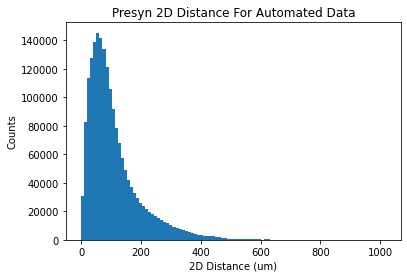

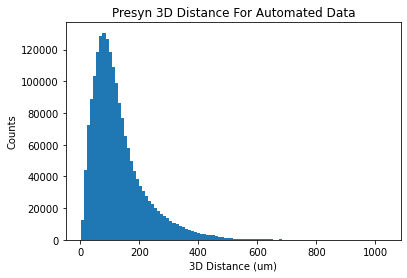

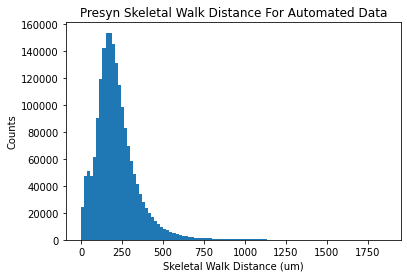

In [101]:
data_string = ["2D Distance","3D Distance","Skeletal Walk Distance"]
data = [distances_2D,distances_3D,skeletal_distances]
n_bins = 100

for d,ds in zip(data,data_string): 
    #d,ds = data[0],data_string[0]
    fig,ax = plt.subplots()
    ax.hist(d,bins=n_bins)
    ax.set_title(f"Presyn {ds} For Automated Data")
    ax.set_xlabel(f"{ds} (um)")
    ax.set_ylabel(f"Counts")
    plt.show()

    

# Getting the automated data

In [62]:
import proofreading_utils as pu

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40)
30.00,10957,864691135087399350,864691135087399350,55164,103758,21202,20484
30.00,11021,864691135087399350,864691135087399350,55242,102912,21202,4780
30.00,11047,864691135087399350,864691135087399350,55336,102653,21202,3368
30.00,11065,864691135087399350,864691135087399350,55397,103990,21199,628
30.00,11075,864691135087399350,864691135087399350,55429,103423,21201,6292
30.00,11081,864691135087399350,864691135087399350,55444,103664,21203,2932
30.00,11203,864691135087399350,864691135087399350,55786,104910,21208,14656
30.00,11220,864691135087399350,864691135087399350,55778,102596,21203,2840
30.00,11240,864691135087399350,864691135087399350,56040,104665,21199,16628
30.00,11338,864691135087399350,864691135087399350,56036,101908,21200,264


# getting the synapses for one manual neuron

In [79]:
proofread_segments_with_center = (minnie.AutoProofreadValidationSegmentMap.proj(new_version="ver") *
                                  minnie.AutoProofreadNeurons3.proj("soma_x","soma_y","soma_z"))
proofread_segments_with_center

new_version materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)"
49.00,225498,864691135724333739,0.08,864691135564655959,0,0.25,30.00,5,0,0,3,149648,151631,17554
49.00,262773,864691136023889209,0.08,864691135233108569,0,0.25,30.00,5,0,0,3,168039,161890,21493
49.00,269247,864691135462463389,0.08,864691136105498585,0,0.25,30.00,5,0,0,3,177560,213859,19894
49.00,271518,864691136108768952,0.08,864691136333776819,0,0.25,30.00,5,0,0,3,168626,226043,21123
49.00,294545,864691135517422218,0.08,864691135771629819,0,0.25,30.00,5,0,0,3,183081,135786,21116
49.00,300763,864691136116205476,0.08,864691136105484249,0,0.25,30.00,5,0,0,3,182133,178301,20198
49.00,301095,864691135446675028,0.08,864691135212632448,0,0.25,30.00,5,0,0,3,185332,185160,21268
49.00,330079,864691135564752471,0.08,864691136311740477,0,0.25,30.00,5,0,0,3,204791,143894,19175
49.00,330326,864691136378815445,0.08,864691135491233631,0,0.25,30.00,5,0,0,3,206866,155362,20512
49.00,331945,864691135953898760,0.08,864691135945413668,0,0.25,30.00,5,0,0,3,198042,174696,16950


In [80]:
proofread_segment_ids,proof_sx,proof_sy,proof_sz = proofread_segments_with_center.fetch(
                                                    "segment_id","soma_x","soma_y","soma_z")
proofread_soma_centers = np.vstack([proof_sx,proof_sy,proof_sz]).T*[4,4,40]
proofread_soma_centers

array([[ 598592,  606524,  702160],
       [ 672156,  647560,  859720],
       [ 710240,  855436,  795760],
       [ 674504,  904172,  844920],
       [ 732324,  543144,  844640],
       [ 728532,  713204,  807920],
       [ 741328,  740640,  850720],
       [ 819164,  575576,  767000],
       [ 827464,  621448,  820480],
       [ 792168,  698784,  678000],
       [ 795676,  754760,  791560],
       [1101272,  640736,  953040],
       [1148300,  500400,  955000],
       [1162296,  541824, 1076960],
       [1167744,  678992,  891080],
       [1169768,  642004, 1029080],
       [1241416,  442844,  763760],
       [1196668,  492924,  919280],
       [1184212,  493284,  936680],
       [1213984,  572772,  878960],
       [1192324,  637144,  979040],
       [1188184,  674872,  953800],
       [1209312,  711036,  652440],
       [1303364,  548128,  775360],
       [1298844,  572148,  797760],
       [1296848,  522564,  829760],
       [1246040,  629716,  917480],
       [1283140,  621668, 10

In [103]:
proof_dict = dict()
verbose = True

In [85]:
curr_index = 0
segment_id = proofread_segment_ids[curr_index]
soma_center = proofread_soma_centers[curr_index]
split_index = 0

if verbose:
    print(f"Working on index {curr_index}: Neuron {segment_id}")
    print(f"soma_center = {soma_center}")

Working on index 0: Neuron 864691135724333739
soma_center = [598592 606524 702160]


In [66]:
# downloading the neuron
neuron_obj = (minnie.Decomposition() & dict(segment_id =segment_id,
                             split_index=split_index)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [69]:
# getting the synapses data and synapse centers
beginning_direct_connections = du.segment_id_to_synapse_table(segment_id,
                                                              synapse_type="presyn",
                                                            validation=False)
synapse_x,synapse_y,synapse_z = beginning_direct_connections.fetch("synapse_x","synapse_y","synapse_z")
val_syn_centers = np.vstack([synapse_x,synapse_y,synapse_z]).T*[4,4,40]
val_syn_centers

array([[419136, 604000, 942560],
       [422328, 577088, 875760],
       [430200, 675320, 820440],
       ...,
       [949512, 734656, 809200],
       [952400, 741752, 810320],
       [955896, 747144, 812840]])

In [71]:
# getting the skeletal walk distance
syn_dist = nru.synapse_skeletal_distances_to_soma(neuron_obj=neuron_obj,
                                               synapse_coordinates=val_syn_centers,
                                               verbose = True,

                                              )

Having ot generate KDTree from scratch
Synapse 1 distance: 603.3479153113825
Synapse 2 distance: 485.56444198299727
Synapse 3 distance: 485.16445673272733
Synapse 4 distance: 471.16668656748334
Synapse 7 distance: 584.7493307622749
Synapse 8 distance: 421.66808835264123
Synapse 9 distance: 575.5100015738973
Synapse 10 distance: 564.5108525863405
Synapse 11 distance: 461.08956955974674
Synapse 12 distance: 463.88938555109394
Synapse 13 distance: 480.8876450077124
Synapse 14 distance: 476.78797413450974
Synapse 15 distance: 485.387370936519
Synapse 16 distance: 517.1838831485617
Synapse 17 distance: 518.4837456128878
Synapse 18 distance: 442.6659707735603
Synapse 19 distance: 447.4656862734744
Synapse 20 distance: 527.5824243192504
Synapse 21 distance: 491.2864388686336
Synapse 22 distance: 495.2858390933173
Synapse 23 distance: 410.86855670926735
Synapse 27 distance: 385.07117654964617
Synapse 28 distance: 323.8947439203201
Synapse 29 distance: 311.59672567563894
Synapse 30 distance: 30

Synapse 320 distance: 161.2680383341465
Synapse 321 distance: 162.66682965546622
Synapse 322 distance: 174.9656376347131
Synapse 325 distance: 233.19554635484099
Synapse 326 distance: 222.19681196342592
Synapse 327 distance: 197.4881384914614
Synapse 328 distance: 200.18806829305979
Synapse 329 distance: 204.7880014260081
Synapse 330 distance: 252.12511966492235
Synapse 331 distance: 256.42492151920993
Synapse 332 distance: 258.02487303224694
Synapse 333 distance: 320.64849180804384
Synapse 334 distance: 227.80922098502535
Synapse 335 distance: 304.8589264107534
Synapse 336 distance: 310.5586546935334
Synapse 337 distance: 313.75848354671905
Synapse 339 distance: 226.8843671601899
Synapse 340 distance: 231.08423340163662
Synapse 341 distance: 245.80630802773427
Synapse 342 distance: 253.70588847505883
Synapse 343 distance: 268.62432717822105
Synapse 344 distance: 270.22422556646563
Synapse 345 distance: 272.7239220864957
Synapse 346 distance: 266.2243436931325
Synapse 347 distance: 187

In [107]:
idx_to_keep = np.where(syn_dist >0)[0]

curr_distances_2D = np.linalg.norm(val_syn_centers[:,:2] - soma_center[:2],axis=1)/1000
curr_distances_2D = curr_distances_2D[idx_to_keep]

curr_distances_3D = np.linalg.norm(val_syn_centers - soma_center,axis=1)/1000
curr_distances_3D = curr_distances_3D[idx_to_keep]


curr_skeletal_distances = syn_dist[idx_to_keep]

proof_dict[segment_id] = dict(distances_2D =curr_distances_2D,
                             distances_3D=curr_distances_3D,
                             skeletal_distances=curr_skeletal_distances)

if verbose:
    print(f"For Segment_id = {segment_id}: 3D, 2D and skeletal mean = {np.mean(curr_distances_3D),np.mean(curr_distances_2D),np.mean(curr_skeletal_distances)}")

proof_dict

For Segment_id = 864691135724333739: 3D, 2D and skeletal mean = (182.7665574180584, 142.91931746337252, 308.07939405119964)


{864691135724333739: {'distances_2D': array([178.70499655, 181.90314808, 181.71016082, 174.32645353,
         165.533047  , 158.11784896, 158.06206745, 150.69319215,
         156.22017985, 154.66524621, 151.13935742, 150.94310308,
         148.79069143, 147.22673431, 146.26482749, 163.76094172,
         161.38899318, 145.62395325, 146.91367092, 144.47023693,
         150.58255649, 137.80118995, 118.41014457, 108.79923654,
         104.31053554, 101.08533908, 100.5294516 ,  92.13193774,
         154.59756278,  84.22685985, 153.47562569, 151.15952183,
         130.59454868, 127.23579654, 125.69767928,  81.8212523 ,
          71.39170562,  64.57902384,  61.57677341, 126.5338674 ,
          77.91871755,  58.67241737,  50.72917157,  74.26027449,
         139.76253604, 137.07350647, 136.29966075, 135.03225061,
          72.59773231,  45.37807488,  65.66774612,  47.63031253,
          49.25184082,  51.17754586, 128.77046773, 126.98327506,
         130.10007674, 124.25396966, 119.85301645,  58

In [ ]:
"""
Plotting the distribution of the synapses 


"""

# Running All of the proofread synapses through proessing pipeline

In [ ]:
proof_dict = dict()
verbose = True

for curr_index in range(len(proofread_segment_ids)):
    segment_id = proofread_segment_ids[curr_index]
    soma_center = proofread_soma_centers[curr_index]
    split_index = 0

    if verbose:
        print(f"Working on index {curr_index}: Neuron {segment_id}")
        print(f"soma_center = {soma_center}")
        
    # downloading the neuron
    neuron_obj = (minnie.Decomposition() & dict(segment_id =segment_id,
                                 split_index=split_index)).fetch1("decomposition")

    # getting the synapses data and synapse centers
    beginning_direct_connections = du.segment_id_to_synapse_table(segment_id,
                                                                  synapse_type="presyn",
                                                                validation=False)
    synapse_x,synapse_y,synapse_z = beginning_direct_connections.fetch("synapse_x","synapse_y","synapse_z")
    val_syn_centers = np.vstack([synapse_x,synapse_y,synapse_z]).T*[4,4,40]

    if verbose:
        print(f"Number of synapse = {len(val_syn_centers)}")


    # getting the skeletal walk distance
    syn_dist = nru.synapse_skeletal_distances_to_soma(neuron_obj=neuron_obj,
                                                   synapse_coordinates=val_syn_centers,
                                                   verbose = True,

                                                  )

    idx_to_keep = np.where(syn_dist >0)[0]

    curr_distances_2D = np.linalg.norm(val_syn_centers[:,:2] - soma_center[:2],axis=1)/1000
    curr_distances_2D = curr_distances_2D[idx_to_keep]

    curr_distances_3D = np.linalg.norm(val_syn_centers - soma_center,axis=1)/1000
    curr_distances_3D = curr_distances_3D[idx_to_keep]


    curr_skeletal_distances = syn_dist[idx_to_keep]

    proof_dict[segment_id] = dict(distances_2D =curr_distances_2D,
                                 distances_3D=curr_distances_3D,
                                 skeletal_distances=curr_skeletal_distances)

    if verbose:
        print(f"For Segment_id = {segment_id}: 3D, 2D and skeletal mean = {np.mean(curr_distances_3D),np.mean(curr_distances_2D),np.mean(curr_skeletal_distances)}")



Working on index 0: Neuron 864691135724333739
soma_center = [598592 606524 702160]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 523
Having ot generate KDTree from scratch
Synapse 1 distance: 603.3479153113825
Synapse 2 distance: 485.56444198299727
Synapse 3 distance: 485.16445673272733
Synapse 4 distance: 471.16668656748334
Synapse 7 distance: 584.7493307622749
Synapse 8 distance: 421.66808835264123
Synapse 9 distance: 575.5100015738973
Synapse 10 distance: 564.5108525863405
Synapse 11 distance: 461.08956955974674
Synapse 12 distance: 463.88938555109394
Synapse 13 distance: 480.8876450077124
Synapse 14 distance: 476.78797413450974
Synapse 15 distance: 485.387370936519
Synapse 16 distance: 517.1838831485617
Synapse 17 distance: 518.4837456128878
Synapse 18 distance: 442.6659707735603
Synapse 19 distance: 447.4656862734744
Synapse 20 distance: 527.5824243192504
Synapse 21 distance: 491.2864388686336
Synapse 22 distance: 495.2858390933173
Synapse 23 distan

Synapse 315 distance: 236.8274868227698
Synapse 316 distance: 240.92576972596547
Synapse 317 distance: 214.69901092666043
Synapse 318 distance: 216.59831986002715
Synapse 319 distance: 216.50993280201905
Synapse 320 distance: 161.2680383341465
Synapse 321 distance: 162.66682965546622
Synapse 322 distance: 174.9656376347131
Synapse 325 distance: 233.19554635484099
Synapse 326 distance: 222.19681196342592
Synapse 327 distance: 197.4881384914614
Synapse 328 distance: 200.18806829305979
Synapse 329 distance: 204.7880014260081
Synapse 330 distance: 252.12511966492235
Synapse 331 distance: 256.42492151920993
Synapse 332 distance: 258.02487303224694
Synapse 333 distance: 320.64849180804384
Synapse 334 distance: 227.80922098502535
Synapse 335 distance: 304.8589264107534
Synapse 336 distance: 310.5586546935334
Synapse 337 distance: 313.75848354671905
Synapse 339 distance: 226.8843671601899
Synapse 340 distance: 231.08423340163662
Synapse 341 distance: 245.80630802773427
Synapse 342 distance: 25

Synapse 102 distance: 193.65865588705512
Synapse 103 distance: 190.65907457090336
Synapse 104 distance: 148.0618035952914
Synapse 105 distance: 142.66216726205587
Synapse 106 distance: 200.7821741687862
Synapse 107 distance: 200.38217718984345
Synapse 120 distance: 110.6215240667376
Synapse 127 distance: 126.76369048565607
Synapse 128 distance: 172.68590371155665
Synapse 129 distance: 125.4205998929456
Synapse 143 distance: 86.63300115502403
Synapse 144 distance: 106.54306118041552
Synapse 145 distance: 90.16330968897503
Synapse 146 distance: 141.94959583814608
Synapse 147 distance: 129.85063255921827
Synapse 151 distance: 734.997622619662
Synapse 152 distance: 732.2977209347741
Synapse 153 distance: 796.2229021375753
Synapse 154 distance: 803.5224757124131
Synapse 161 distance: 714.5992690036354
Synapse 162 distance: 721.6986809901982
Synapse 163 distance: 79.66359295134592
Synapse 164 distance: 681.303722285799
Synapse 165 distance: 705.1000094061704
Synapse 166 distance: 743.6963027

Synapse 500 distance: 150.24681280534787
Synapse 513 distance: 156.81111511593386
Synapse 514 distance: 184.8038888131865
Synapse 515 distance: 260.9139223207156
Synapse 516 distance: 201.5028514674058
Synapse 517 distance: 201.10286194635998
Synapse 520 distance: 181.20427500154318
Synapse 521 distance: 175.64088914751983
Synapse 522 distance: 177.24083797927767
Synapse 523 distance: 168.80613024843277
Synapse 524 distance: 168.40613053970165
Synapse 525 distance: 154.94084988870443
Synapse 526 distance: 164.73997227066945
Synapse 527 distance: 162.14605548686365
Synapse 529 distance: 193.50082470041815
Synapse 530 distance: 195.50079689832359
Synapse 531 distance: 204.69972727546997
Synapse 532 distance: 206.6995826756797
Synapse 533 distance: 180.8441182515182
Synapse 534 distance: 184.7438484492705
Synapse 535 distance: 184.7438484492705
Synapse 536 distance: 289.5120495128389
Synapse 537 distance: 238.19967541299837
Synapse 538 distance: 218.80066102630124
Synapse 539 distance: 22

Synapse 725 distance: 819.5863414427067
Synapse 726 distance: 819.7863414427069
Synapse 727 distance: 821.3861911654287
Synapse 728 distance: 823.9859878091501
Synapse 729 distance: 919.6783000232571
Synapse 730 distance: 867.6812250271536
Synapse 731 distance: 855.0821039113496
Synapse 732 distance: 826.5708421286025
Synapse 733 distance: 826.4708421286024
Synapse 734 distance: 833.4702982223454
Synapse 735 distance: 888.6802732104034
Synapse 736 distance: 834.884009295036
Synapse 737 distance: 921.8781789392835
Synapse 738 distance: 910.478851335097
Synapse 739 distance: 847.7765388965413
Synapse 740 distance: 864.8535298767624
Synapse 741 distance: 880.2595254988832
Synapse 742 distance: 883.3594507048127
Synapse 743 distance: 993.3382116828967
Synapse 744 distance: 994.7380826463855
Synapse 745 distance: 952.7535779571599
Synapse 746 distance: 968.3500943243408
Synapse 747 distance: 967.6501969967344
Synapse 749 distance: 934.1558840520637
Synapse 750 distance: 907.9569743736412
Sy

Synapse 364 distance: 423.61216454842594
Synapse 365 distance: 423.01226753774404
Synapse 366 distance: 414.31261288237175
Synapse 368 distance: 351.1150641148225
Synapse 369 distance: 399.0129239134899
Synapse 370 distance: 342.31545662756866
Synapse 371 distance: 292.30386039808604
Synapse 372 distance: 292.2039151814272
Synapse 373 distance: 278.31269369821575
Synapse 374 distance: 277.91277971521396
Synapse 375 distance: 269.6131370851775
Synapse 376 distance: 170.8453055837693
Synapse 377 distance: 173.14521042880506
Synapse 378 distance: 180.14460262199458
Synapse 379 distance: 297.3109663608702
Synapse 381 distance: 153.94091656537458
Synapse 382 distance: 152.7409216605955
Synapse 383 distance: 81.47596158778295
Synapse 384 distance: 233.80462986092
Synapse 386 distance: 170.86262926631642
Synapse 388 distance: 266.97781174760695
Synapse 389 distance: 234.21535997392013
Synapse 393 distance: 293.61105843873816
Synapse 394 distance: 185.14438095798434
Synapse 395 distance: 186.0

Synapse 605 distance: 206.60771852720256
Synapse 606 distance: 213.1060719443217
Synapse 607 distance: 203.80805099312903
Synapse 608 distance: 205.81205852510237
Synapse 609 distance: 203.9122609120414
Synapse 611 distance: 345.06235468162663
Synapse 612 distance: 261.18309950426453
Synapse 613 distance: 220.5103166838788
Synapse 614 distance: 220.71027761422124
Synapse 615 distance: 238.43076820886432
Synapse 616 distance: 213.0253844117055
Synapse 620 distance: 281.18181555402305
Synapse 621 distance: 284.7813544213947
Synapse 622 distance: 185.7781002988678
Synapse 623 distance: 191.5775448718953
Synapse 624 distance: 221.21024538318062
Synapse 625 distance: 183.70455476400562
Synapse 626 distance: 174.1686101899503
Synapse 627 distance: 174.33442405000162
Synapse 628 distance: 175.87922017602534
Synapse 629 distance: 195.62730648304802
Synapse 630 distance: 238.33076820886438
Synapse 631 distance: 312.7345676638041
Synapse 632 distance: 297.2807803602468
Synapse 633 distance: 322.

Synapse 108 distance: 118.83576501196077
Synapse 109 distance: 91.8523941829649
Synapse 110 distance: 98.25190450083679
Synapse 111 distance: 80.2395959802196
Synapse 112 distance: 88.50680829914342
Synapse 113 distance: 80.69209150834794
Synapse 114 distance: 97.83823672505632
Synapse 115 distance: 134.09807628345172
Synapse 116 distance: 250.7508941623018
Synapse 118 distance: 110.70040533985345
Synapse 120 distance: 256.6066727159312
Synapse 121 distance: 89.2216086222382
Synapse 122 distance: 89.1025200970283
Synapse 123 distance: 112.644896068244
Synapse 124 distance: 79.8221264351396
Synapse 125 distance: 103.74555348838975
Synapse 126 distance: 263.0050412133862
Synapse 127 distance: 267.3045705208641
Synapse 128 distance: 268.7045331989033
Synapse 129 distance: 54.51474833785971
Synapse 130 distance: 273.2501136999302
Synapse 132 distance: 245.6512009365273
Synapse 133 distance: 295.1027050797355
Synapse 134 distance: 281.0034594234271
Synapse 135 distance: 98.59835858965803
Sy

Synapse 202 distance: 131.3734816079434
Synapse 203 distance: 366.32096316778274
Synapse 204 distance: 622.2282754753462
Synapse 205 distance: 300.7915073127248
Synapse 208 distance: 226.12788433948663
Synapse 209 distance: 299.62634017725117
Synapse 210 distance: 344.02411749225286
Synapse 211 distance: 350.7224615390399
Synapse 212 distance: 350.7224615390399
Synapse 213 distance: 274.2430787679276
Synapse 214 distance: 270.94337579105274
Synapse 215 distance: 307.22603063643413
Synapse 216 distance: 564.9327893687243
Synapse 217 distance: 565.0327881310906
Synapse 218 distance: 586.4311229786549
Synapse 219 distance: 595.3307105656272
Synapse 220 distance: 586.3311229786548
Synapse 221 distance: 587.830888914441
Synapse 222 distance: 251.09718702059274
Synapse 223 distance: 265.5946449620577
Synapse 224 distance: 334.025607623401
Synapse 225 distance: 123.97372751970545
Synapse 226 distance: 112.27763337021781
Synapse 227 distance: 537.7345853887077
Synapse 228 distance: 536.6346378

Synapse 443 distance: 448.53819822101764
Synapse 448 distance: 376.69053892129364
Synapse 449 distance: 377.4904900264871
Synapse 450 distance: 385.9897966208916
Synapse 451 distance: 321.6854469904501
Synapse 452 distance: 290.71307853127905
Synapse 453 distance: 290.7039226264842
Synapse 454 distance: 298.35771744595036
Synapse 455 distance: 297.4582480950299
Synapse 456 distance: 295.6583058302345
Synapse 457 distance: 285.9898464836313
Synapse 460 distance: 404.1185909678428
Synapse 461 distance: 347.2821135966884
Synapse 462 distance: 348.8818688295452
Synapse 463 distance: 340.5253783713995
Synapse 464 distance: 346.02532572581515
Synapse 465 distance: 350.62502889831154
Synapse 466 distance: 113.00089901997009
Synapse 467 distance: 263.00661302533746
Synapse 468 distance: 352.24902516518915
Synapse 469 distance: 148.91068169677692
Synapse 470 distance: 160.2102237071404
Synapse 471 distance: 164.80957514042473
Synapse 472 distance: 313.08591321519384
Synapse 473 distance: 267.00

Synapse 697 distance: 678.3018827451623
Synapse 698 distance: 686.3008795239609
Synapse 699 distance: 702.0999895751942
Synapse 700 distance: 706.0997626811617
Synapse 701 distance: 743.3932048507089
Synapse 702 distance: 767.0908823232775
Synapse 703 distance: 773.9904105035997
For Segment_id = 864691135517422218: 3D, 2D and skeletal mean = (250.0900755787572, 227.87615639541062, 371.9234612946464)
Working on index 5: Neuron 864691136116205476
soma_center = [728532 713204 807920]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 217
Having ot generate KDTree from scratch
Synapse 0 distance: 358.0450128777864
Synapse 1 distance: 363.94359620729284
Synapse 2 distance: 365.443467809025
Synapse 3 distance: 355.14553319106983
Synapse 4 distance: 343.3479530686582
Synapse 5 distance: 346.34698575228595
Synapse 6 distance: 335.84881870691936
Synapse 7 distance: 371.54132043006587
Synapse 8 distance: 375.84056853878707
Synapse 9 distance: 377.0405038997347
Synapse 

Synapse 211 distance: 208.98412314567008
Synapse 212 distance: 174.43925138002078
Synapse 213 distance: 227.87977207264518
Synapse 214 distance: 171.13942224867154
Synapse 215 distance: 215.78569097035714
Synapse 216 distance: 219.38550140383322
For Segment_id = 864691136116205476: 3D, 2D and skeletal mean = (123.59675920524208, 102.4524838713885, 282.9531221444727)
Working on index 6: Neuron 864691135446675028
soma_center = [741328 740640 850720]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 295
Having ot generate KDTree from scratch
Synapse 0 distance: 457.9545015073544
Synapse 1 distance: 475.527817318945
Synapse 2 distance: 475.727817318945
Synapse 3 distance: 430.558535857921
Synapse 4 distance: 426.6591322518019
Synapse 5 distance: 410.4603632997504
Synapse 6 distance: 410.0604101168987
Synapse 7 distance: 410.4603632997504
Synapse 8 distance: 385.36578845999605
Synapse 9 distance: 350.0704001286313
Synapse 10 distance: 366.0682959690336
Synapse 11

Synapse 252 distance: 250.346411680378
Synapse 253 distance: 251.34624573981182
Synapse 254 distance: 257.54504156955346
Synapse 255 distance: 257.32624364531216
Synapse 256 distance: 277.6429267666457
Synapse 259 distance: 310.1949938830481
Synapse 260 distance: 297.63971388951364
Synapse 261 distance: 302.43920551984104
Synapse 262 distance: 291.04043292422983
Synapse 263 distance: 343.74741544965457
Synapse 264 distance: 330.690865052873
Synapse 265 distance: 293.7874658165011
Synapse 266 distance: 295.99353900541104
Synapse 267 distance: 297.4935254722045
Synapse 275 distance: 341.3853618540255
Synapse 278 distance: 356.0849102840021
Synapse 279 distance: 363.8844029761468
Synapse 280 distance: 358.6846626534653
Synapse 281 distance: 379.98098023692984
Synapse 282 distance: 384.38089788935775
Synapse 284 distance: 430.7788997351936
Synapse 285 distance: 421.67925722953447
Synapse 286 distance: 429.3789557009202
Synapse 288 distance: 449.77689095313207
Synapse 290 distance: 492.4720

Synapse 177 distance: 296.54853035658874
Synapse 179 distance: 312.5874946702552
Synapse 180 distance: 325.6862103021026
Synapse 181 distance: 315.7842728262432
Synapse 182 distance: 314.2849912896277
Synapse 183 distance: 320.9863534813062
Synapse 184 distance: 59.79213075048827
Synapse 185 distance: 57.79215071300504
Synapse 186 distance: 299.46761123597275
Synapse 187 distance: 546.886910921427
Synapse 188 distance: 560.2855981440129
Synapse 189 distance: 519.5640645856602
Synapse 190 distance: 524.5632940075881
Synapse 191 distance: 524.8644123451281
Synapse 192 distance: 533.9875369028084
Synapse 193 distance: 532.0875633677144
Synapse 194 distance: 536.163580407269
Synapse 195 distance: 536.9635630532488
Synapse 196 distance: 528.86383083143
Synapse 197 distance: 560.0609239015137
Synapse 198 distance: 556.5613634207925
Synapse 199 distance: 560.4608516037797
Synapse 200 distance: 558.5610317067047
Synapse 201 distance: 578.2601873383146
Synapse 203 distance: 264.84376679739034
S

Synapse 386 distance: 463.3376376265281
Synapse 387 distance: 470.9372320167588
Synapse 388 distance: 457.4378725117486
Synapse 389 distance: 286.9576461126564
Synapse 390 distance: 279.9579111706459
Synapse 391 distance: 283.6577602524755
Synapse 392 distance: 438.43871442975274
Synapse 393 distance: 471.6336501461457
Synapse 394 distance: 391.6307373984028
Synapse 395 distance: 392.930478270893
Synapse 396 distance: 281.8930606576094
Synapse 397 distance: 448.9381235534117
Synapse 398 distance: 402.32954429776305
Synapse 399 distance: 411.3290507620096
Synapse 400 distance: 357.9441973399887
Synapse 401 distance: 365.1436980819816
Synapse 402 distance: 366.64367871017294
Synapse 403 distance: 368.14351229336984
Synapse 404 distance: 315.3543790814748
Synapse 405 distance: 451.90811785090375
Synapse 406 distance: 452.30809408039664
Synapse 408 distance: 416.62887636598646
Synapse 409 distance: 449.73790982110756
Synapse 410 distance: 370.6433016742792
Synapse 411 distance: 372.9431831

Synapse 598 distance: 763.7994315111099
Synapse 599 distance: 959.0173690450262
Synapse 600 distance: 960.6173340464806
Synapse 601 distance: 960.3173340464807
Synapse 602 distance: 960.5173340464808
Synapse 603 distance: 965.6169556011205
Synapse 604 distance: 775.3514055129519
Synapse 605 distance: 776.3511804341057
Synapse 606 distance: 903.8857871302239
Synapse 607 distance: 907.885385639557
Synapse 608 distance: 899.2862914545989
Synapse 609 distance: 885.3881741438025
Synapse 610 distance: 989.2625188858807
Synapse 611 distance: 985.0634034649737
Synapse 612 distance: 984.9634034649735
Synapse 614 distance: 860.8905365932661
Synapse 615 distance: 863.4903162570785
Synapse 616 distance: 916.184339987517
Synapse 617 distance: 787.1500390068096
Synapse 618 distance: 782.1505657174391
Synapse 619 distance: 856.1909017636958
Synapse 620 distance: 846.0920119274546
Synapse 621 distance: 825.2414303187337
Synapse 622 distance: 806.9431657244863
Synapse 623 distance: 811.7425628682777
Sy

Synapse 185 distance: 277.61214486480696
Synapse 186 distance: 283.510877906784
Synapse 187 distance: 125.26251201943204
Synapse 188 distance: 127.56183966926787
Synapse 189 distance: 128.4617952571761
Synapse 190 distance: 258.84695008150675
Synapse 191 distance: 286.6105732238291
Synapse 192 distance: 154.37540987779735
Synapse 193 distance: 220.04984064242265
Synapse 194 distance: 220.34965380832693
Synapse 195 distance: 245.5475673156789
Synapse 196 distance: 345.6034994153039
Synapse 197 distance: 346.4032696494081
Synapse 198 distance: 317.10684006844383
Synapse 199 distance: 314.30707291410135
Synapse 200 distance: 328.70623575574945
Synapse 201 distance: 175.77203850173464
Synapse 202 distance: 149.4438886162078
Synapse 203 distance: 151.0435995309417
Synapse 204 distance: 152.6435305174068
Synapse 205 distance: 176.24160766323575
Synapse 206 distance: 181.24138087149683
Synapse 207 distance: 180.04147906322603
Synapse 208 distance: 433.7876222512285
Synapse 209 distance: 431.6

Synapse 84 distance: 117.34924563979763
Synapse 85 distance: 237.3268559562673
Synapse 86 distance: 234.1690003374099
Synapse 87 distance: 245.26733322432057
Synapse 88 distance: 245.26733322432057
Synapse 89 distance: 130.07331933898274
Synapse 92 distance: 160.76912448694836
Synapse 94 distance: 180.5301763389376
Synapse 95 distance: 295.31747222085005
Synapse 96 distance: 276.1182821651306
Synapse 97 distance: 283.7180582247648
Synapse 98 distance: 284.66273266073574
Synapse 99 distance: 285.66239921419947
Synapse 100 distance: 132.24735618727243
Synapse 101 distance: 140.74647638404386
Synapse 102 distance: 166.16888474652515
Synapse 103 distance: 136.8121387210215
Synapse 104 distance: 139.61186251042523
Synapse 105 distance: 158.6017403135598
Synapse 106 distance: 225.03119945560672
Synapse 107 distance: 177.2996097842754
Synapse 108 distance: 159.01018590062137
Synapse 109 distance: 160.51017025405713
Synapse 110 distance: 197.29846397266115
Synapse 111 distance: 204.99829379544

Synapse 197 distance: 145.90168305872137
Synapse 198 distance: 152.51841755049838
Synapse 199 distance: 158.41804074819464
Synapse 200 distance: 279.3321963266292
Synapse 201 distance: 424.1513429492022
Synapse 202 distance: 355.78737435483424
Synapse 203 distance: 359.8871024804194
Synapse 205 distance: 381.55399800824773
Synapse 206 distance: 389.5536144712924
Synapse 207 distance: 187.50000969467283
Synapse 208 distance: 190.59984185769068
Synapse 209 distance: 190.49984189198267
Synapse 210 distance: 193.69917107891357
Synapse 211 distance: 195.09908680888148
Synapse 213 distance: 162.2010922223336
Synapse 214 distance: 110.58728167429136
Synapse 215 distance: 125.18610653724545
Synapse 216 distance: 110.48729208484117
Synapse 217 distance: 111.38722611115371
Synapse 218 distance: 288.9318406976087
Synapse 220 distance: 340.82581924831516
Synapse 221 distance: 346.3256552241077
Synapse 222 distance: 130.48461007376474
Synapse 223 distance: 133.38432648698642
Synapse 224 distance: 3

Synapse 48 distance: 274.09202854815294
Synapse 49 distance: 284.52206527673894
Synapse 50 distance: 241.42142824652194
Synapse 51 distance: 255.82470642812297
Synapse 52 distance: 251.42497050453875
Synapse 53 distance: 287.40867434583515
Synapse 54 distance: 244.39483225148663
Synapse 55 distance: 255.63365092738658
Synapse 56 distance: 263.63279306797523
Synapse 57 distance: 263.4328205072998
Synapse 59 distance: 226.0096996972716
Synapse 60 distance: 221.90980443384709
Synapse 61 distance: 216.6964208527884
Synapse 62 distance: 275.109509292456
Synapse 63 distance: 258.71607607740464
Synapse 64 distance: 301.5112007285605
Synapse 65 distance: 304.0110395150276
Synapse 66 distance: 272.114853446318
Synapse 67 distance: 271.91485344631803
Synapse 68 distance: 318.1080464943535
Synapse 69 distance: 308.510241221635
Synapse 70 distance: 289.412998415809
Synapse 71 distance: 291.7126806619426
Synapse 72 distance: 351.1783687336691
Synapse 73 distance: 343.3019031360817
Synapse 74 distan

Synapse 259 distance: 403.3348051908008
Synapse 261 distance: 381.70789968495
Synapse 262 distance: 267.4608289029883
Synapse 263 distance: 243.83376900575732
Synapse 264 distance: 427.3997494727958
Synapse 265 distance: 133.33135893718725
Synapse 267 distance: 269.99373275745705
Synapse 268 distance: 224.22382838838445
Synapse 269 distance: 228.32330980653003
Synapse 270 distance: 228.6232739267956
Synapse 271 distance: 268.6937489586358
Synapse 272 distance: 293.0161659229546
Synapse 273 distance: 290.0164056357641
Synapse 274 distance: 316.21406567039975
Synapse 275 distance: 437.6991266344743
Synapse 276 distance: 323.81392192835773
Synapse 277 distance: 330.31349465144524
Synapse 279 distance: 456.9982415759191
Synapse 280 distance: 460.49796371871616
Synapse 282 distance: 145.83063215861122
Synapse 283 distance: 156.92997185439992
Synapse 284 distance: 269.21879555404155
Synapse 285 distance: 273.7186062428714
Synapse 286 distance: 343.5123674875558
Synapse 287 distance: 160.6297

Synapse 230 distance: 279.93998348854973
Synapse 231 distance: 268.1976430465239
Synapse 233 distance: 188.9195320486542
Synapse 234 distance: 196.01919522804334
Synapse 235 distance: 196.619040808881
Synapse 237 distance: 267.3409146506284
Synapse 238 distance: 267.7408781252439
Synapse 241 distance: 214.91547448866493
Synapse 242 distance: 241.41158896923173
Synapse 243 distance: 165.3195410597722
Synapse 244 distance: 233.41312921536098
Synapse 245 distance: 211.3156372875781
Synapse 246 distance: 80.73435468641938
Synapse 247 distance: 187.35282741900747
Synapse 248 distance: 204.25241060809813
Synapse 249 distance: 288.73882984066535
Synapse 250 distance: 299.6575380738983
Synapse 251 distance: 316.55439992665157
Synapse 252 distance: 308.95594424309485
Synapse 253 distance: 372.0482650211634
Synapse 254 distance: 407.44583417232735
Synapse 255 distance: 328.35283559759654
Synapse 256 distance: 221.05155824005433
Synapse 257 distance: 227.9510102410662
Synapse 260 distance: 208.35

Synapse 198 distance: 165.7319498156493
Synapse 199 distance: 173.53072344328936
Synapse 200 distance: 200.75389770760518
Synapse 201 distance: 200.55390477662405
Synapse 202 distance: 198.70067682943258
Synapse 206 distance: 240.6512006911048
Synapse 207 distance: 313.16924137725505
Synapse 208 distance: 189.1574782121449
Synapse 209 distance: 206.6561671291233
Synapse 210 distance: 271.97432059063107
Synapse 212 distance: 265.5751514768936
Synapse 214 distance: 331.0790284641357
Synapse 215 distance: 300.670692022259
Synapse 218 distance: 180.7581169944218
Synapse 219 distance: 327.56805682392803
Synapse 220 distance: 323.3682572434619
Synapse 221 distance: 319.1689180355806
Synapse 222 distance: 353.0095506686359
Synapse 223 distance: 341.9317336084433
Synapse 224 distance: 174.3306676253455
Synapse 225 distance: 242.08191769318435
Synapse 226 distance: 248.98149271243972
Synapse 227 distance: 310.4882632320049
Synapse 228 distance: 312.5325124365309
Synapse 229 distance: 365.194109

Synapse 38 distance: 490.6936587431978
Synapse 39 distance: 357.60202823313597
Synapse 41 distance: 341.3036028665481
Synapse 42 distance: 332.8040849159172
Synapse 43 distance: 310.5293097402382
Synapse 44 distance: 438.69893988582373
Synapse 45 distance: 279.02642757785605
Synapse 46 distance: 332.5618128940063
Synapse 47 distance: 260.4282625664013
Synapse 48 distance: 289.4384262217504
Synapse 49 distance: 276.2398406009296
Synapse 50 distance: 274.2266876879606
Synapse 52 distance: 286.63852262674004
Synapse 53 distance: 282.638678723925
Synapse 54 distance: 282.5386829503958
Synapse 55 distance: 315.86282361319667
Synapse 56 distance: 257.7218112030349
Synapse 57 distance: 265.2418453362595
Synapse 58 distance: 248.83005753763985
Synapse 59 distance: 246.1303586417352
Synapse 60 distance: 324.3788774113949
Synapse 61 distance: 324.0789423207149
Synapse 62 distance: 386.44437520586325
Synapse 63 distance: 346.74729036124575
Synapse 64 distance: 224.93166339727296
Synapse 65 distan

Synapse 252 distance: 435.2937423126634
Synapse 253 distance: 445.79280656707476
Synapse 254 distance: 299.97859927671806
Synapse 255 distance: 330.28582386230505
Synapse 256 distance: 225.74292517487547
Synapse 257 distance: 378.04266088746164
Synapse 258 distance: 488.05601238316683
Synapse 259 distance: 499.6034154626486
Synapse 260 distance: 513.0001636719801
Synapse 261 distance: 501.1031835272637
Synapse 262 distance: 479.75723439115563
Synapse 263 distance: 399.5673564450412
Synapse 264 distance: 401.5665152311504
Synapse 265 distance: 234.04243941943216
Synapse 266 distance: 243.4219962763062
Synapse 267 distance: 463.10274804153516
Synapse 268 distance: 341.87498450388443
Synapse 269 distance: 353.8731243367111
Synapse 270 distance: 388.8712110138444
Synapse 271 distance: 518.2998807574626
Synapse 272 distance: 395.4408366295047
Synapse 273 distance: 326.3765317141635
Synapse 274 distance: 327.7764319277698
Synapse 275 distance: 307.7875887843318
Synapse 276 distance: 318.0869

Synapse 145 distance: 159.69535562709368
Synapse 146 distance: 167.87095502544992
Synapse 147 distance: 169.7699545377848
Synapse 168 distance: 188.16726135714552
Synapse 169 distance: 201.16589127074653
Synapse 170 distance: 220.53508924851297
Synapse 171 distance: 555.691786920407
Synapse 172 distance: 224.93475632967503
Synapse 176 distance: 183.49405739853128
Synapse 177 distance: 202.96996309641767
Synapse 178 distance: 187.29027547348616
Synapse 179 distance: 186.89028467616126
Synapse 180 distance: 204.08714115689745
Synapse 181 distance: 206.56940578029332
Synapse 182 distance: 581.2899196999671
Synapse 183 distance: 586.2895778006557
Synapse 199 distance: 220.86567812636406
Synapse 200 distance: 227.06322851541958
Synapse 201 distance: 210.18913431845286
Synapse 205 distance: 336.2701872401736
Synapse 207 distance: 232.56291836266308
Synapse 208 distance: 325.07197010051385
Synapse 209 distance: 358.7673501360407
Synapse 210 distance: 256.629238736178
Synapse 211 distance: 229

Synapse 134 distance: 406.3304258104068
Synapse 135 distance: 436.2153579304441
Synapse 136 distance: 613.1383865931258
Synapse 137 distance: 416.9165048865634
Synapse 138 distance: 397.81849802909323
Synapse 139 distance: 591.239391251201
Synapse 140 distance: 616.846333421769
Synapse 141 distance: 389.91895312617737
Synapse 142 distance: 574.7403817180185
Synapse 143 distance: 378.5313660176716
Synapse 144 distance: 361.7322101373179
Synapse 145 distance: 593.2494866015335
Synapse 146 distance: 584.4503606510284
Synapse 147 distance: 371.419918755451
Synapse 148 distance: 366.8200218311051
Synapse 151 distance: 360.5322430417025
Synapse 152 distance: 355.4324059301127
Synapse 153 distance: 345.0343431180052
Synapse 154 distance: 551.3418998245787
Synapse 155 distance: 574.0514840820152
Synapse 156 distance: 571.2515099580406
Synapse 157 distance: 567.0518106675219
Synapse 158 distance: 566.9518106675218
Synapse 159 distance: 561.6520254635996
Synapse 160 distance: 345.7095126639534
S

Synapse 419 distance: 406.51086475509743
Synapse 420 distance: 417.91014612023105
Synapse 423 distance: 66.65288340673196
Synapse 424 distance: 66.65288340673196
Synapse 425 distance: 355.32327221168487
Synapse 426 distance: 356.822515973804
Synapse 428 distance: 114.17852785375693
Synapse 429 distance: 137.67687281880168
Synapse 430 distance: 113.87456281000304
Synapse 438 distance: 431.0094561923613
Synapse 439 distance: 433.50933735135055
Synapse 440 distance: 120.87494015066875
Synapse 441 distance: 122.07483302644599
Synapse 442 distance: 125.97389363881324
Synapse 443 distance: 147.17666304167312
Synapse 444 distance: 129.0720817425675
Synapse 445 distance: 165.87555683068197
Synapse 446 distance: 157.17576134187252
Synapse 447 distance: 87.9240677537681
Synapse 448 distance: 406.012556669678
Synapse 449 distance: 140.07336326002414
Synapse 456 distance: 456.4058005745184
Synapse 458 distance: 151.1719289789099
Synapse 459 distance: 163.77041388258363
Synapse 462 distance: 502.46

For Segment_id = 864691135644809967: 3D, 2D and skeletal mean = (291.93667011838977, 267.16860814212856, 441.60849665817415)
Working on index 17: Neuron 864691134884807418
soma_center = [1196668  492924  919280]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 414
Having ot generate KDTree from scratch
Synapse 0 distance: 697.7490451918914
Synapse 1 distance: 657.2537388573913
Synapse 2 distance: 611.5574797952606
Synapse 3 distance: 591.6599028454011
Synapse 4 distance: 560.4622628233565
Synapse 5 distance: 560.0623618292722
Synapse 6 distance: 557.0631585530898
Synapse 7 distance: 380.2610378468642
Synapse 8 distance: 381.76054759432674
Synapse 9 distance: 378.86145368766137
Synapse 10 distance: 373.26175676424975
Synapse 11 distance: 366.4625705689909
Synapse 12 distance: 375.0590310819771
Synapse 13 distance: 344.164067026353
Synapse 14 distance: 524.1379189285988
Synapse 15 distance: 352.9606919799018
Synapse 16 distance: 344.2618336399936
Synapse 17 d

Synapse 214 distance: 203.90526366922626
Synapse 215 distance: 231.90304285723337
Synapse 216 distance: 239.4026294857596
Synapse 217 distance: 255.7017885052503
Synapse 218 distance: 281.06612364859967
Synapse 219 distance: 268.30059309620606
Synapse 220 distance: 403.2850219926318
Synapse 221 distance: 404.08493062069255
Synapse 222 distance: 297.1977965511074
Synapse 223 distance: 265.4839374148252
Synapse 224 distance: 306.80939641782754
Synapse 225 distance: 306.80939641782754
Synapse 226 distance: 308.8258294261805
Synapse 227 distance: 181.32679174779076
Synapse 228 distance: 300.21025495607716
Synapse 229 distance: 194.729170903867
Synapse 230 distance: 300.22523005442844
Synapse 234 distance: 157.750617116378
Synapse 235 distance: 249.02023346287106
Synapse 236 distance: 254.5197705315454
Synapse 237 distance: 26.438522310981988
Synapse 238 distance: 322.89572384282275
Synapse 239 distance: 336.3946791283328
Synapse 240 distance: 335.49481115728713
Synapse 241 distance: 27.572

Synapse 39 distance: 566.6068496872764
Synapse 40 distance: 556.0507563204553
Synapse 41 distance: 574.9061422821757
Synapse 42 distance: 572.5062228339841
Synapse 43 distance: 439.41121147286816
Synapse 44 distance: 425.4762745024437
Synapse 45 distance: 424.77628162463543
Synapse 46 distance: 582.2049561016597
Synapse 47 distance: 435.611503823517
Synapse 48 distance: 434.81182083630813
Synapse 49 distance: 642.9564543536709
Synapse 50 distance: 627.5574410942638
Synapse 51 distance: 618.8578486477862
Synapse 52 distance: 420.9763967018083
Synapse 53 distance: 417.05395084579095
Synapse 54 distance: 545.6517018320895
Synapse 55 distance: 532.3524679238828
Synapse 56 distance: 426.35193483259263
Synapse 57 distance: 530.2527596843032
Synapse 58 distance: 401.95478778573977
Synapse 59 distance: 390.25517736176425
Synapse 61 distance: 537.8620588083393
Synapse 65 distance: 469.8603958609318
Synapse 66 distance: 473.66013635889396
Synapse 67 distance: 365.4585763475343
Synapse 68 distanc

Synapse 290 distance: 287.24250785291224
Synapse 293 distance: 511.7813023332475
Synapse 294 distance: 429.57157783838903
Synapse 295 distance: 184.25624228561784
Synapse 298 distance: 552.2390232855732
Synapse 303 distance: 531.2791288542281
Synapse 304 distance: 246.35912450875153
Synapse 305 distance: 233.56043070874597
Synapse 306 distance: 258.05763189774825
Synapse 307 distance: 456.2695361494999
Synapse 308 distance: 212.60259015746436
Synapse 309 distance: 209.90268915564417
Synapse 310 distance: 251.7581172696274
Synapse 311 distance: 99.08436512371465
Synapse 312 distance: 93.38466205000464
Synapse 313 distance: 346.98533103984624
Synapse 314 distance: 67.96702057294577
Synapse 315 distance: 262.85742269878733
Synapse 316 distance: 262.85742269878733
Synapse 317 distance: 220.80182920050868
Synapse 318 distance: 165.79452555348678
Synapse 319 distance: 350.93475255753697
Synapse 320 distance: 231.860478324211
Synapse 321 distance: 222.76095583406175
Synapse 322 distance: 225.

Synapse 515 distance: 353.2743645130955
Synapse 516 distance: 347.57485828115057
Synapse 517 distance: 358.17287871441823
Synapse 518 distance: 38.791286605347516
Synapse 519 distance: 40.733255033922475
Synapse 520 distance: 54.17985639346334
Synapse 521 distance: 50.04977423670582
Synapse 522 distance: 453.8169717427126
Synapse 523 distance: 420.66557251643655
Synapse 524 distance: 425.9652055267394
Synapse 525 distance: 368.6315291243515
Synapse 526 distance: 366.1315360853557
Synapse 527 distance: 354.2322026419936
Synapse 528 distance: 361.4318266819814
Synapse 529 distance: 357.7723996335333
Synapse 530 distance: 358.93443522834843
Synapse 531 distance: 354.6352174000436
Synapse 532 distance: 272.5206092277781
Synapse 533 distance: 281.9191264137381
Synapse 534 distance: 348.1387503345927
Synapse 535 distance: 350.23863096443955
Synapse 536 distance: 339.0358333442643
Synapse 537 distance: 413.1700890349221
Synapse 538 distance: 398.4708135655529
Synapse 539 distance: 181.6016830

Synapse 100 distance: 249.75179876239835
Synapse 101 distance: 257.35096013422896
Synapse 103 distance: 151.4589462791717
Synapse 104 distance: 149.55901182817934
Synapse 105 distance: 250.31513874901847
Synapse 110 distance: 148.70190398911734
Synapse 111 distance: 147.10194210106232
Synapse 112 distance: 146.70194497548775
Synapse 113 distance: 134.26182814032046
Synapse 117 distance: 160.2055175034574
Synapse 122 distance: 224.25528134551772
Synapse 123 distance: 234.2845026637697
Synapse 125 distance: 208.55626123045442
Synapse 126 distance: 208.5863320436835
Synapse 127 distance: 215.78583065786282
Synapse 131 distance: 257.5138167775375
Synapse 132 distance: 255.91389368027572
Synapse 133 distance: 262.5131405416186
Synapse 135 distance: 311.69294291390764
Synapse 140 distance: 197.18787873644467
Synapse 141 distance: 197.28787873644472
Synapse 143 distance: 312.04225923300635
Synapse 145 distance: 187.80075584103278
Synapse 147 distance: 53.83935310221695
Synapse 148 distance: 2

Synapse 339 distance: 617.5039530431699
Synapse 340 distance: 619.4036987481794
Synapse 341 distance: 200.12242403818001
Synapse 342 distance: 206.12163591199462
Synapse 343 distance: 207.83392784717233
Synapse 344 distance: 197.3353142939078
Synapse 345 distance: 199.63510523325476
Synapse 346 distance: 887.429544881696
Synapse 347 distance: 867.5744086132784
Synapse 348 distance: 877.529971214601
Synapse 349 distance: 729.315912009066
Synapse 350 distance: 706.3177901437178
Synapse 351 distance: 286.1772628457757
Synapse 352 distance: 421.8135397867654
Synapse 353 distance: 415.4143023266635
Synapse 354 distance: 294.97614048525173
Synapse 355 distance: 295.376083921115
Synapse 356 distance: 886.6728867300084
Synapse 357 distance: 886.3728978492901
Synapse 358 distance: 316.97433211135484
Synapse 359 distance: 317.1742485862824
Synapse 360 distance: 312.27478326283796
Synapse 361 distance: 241.78471085752196
Synapse 362 distance: 398.6152924106734
Synapse 363 distance: 231.0304854541

Synapse 108 distance: 241.96120134851938
Synapse 109 distance: 245.06054946345242
Synapse 110 distance: 274.69559240556015
Synapse 111 distance: 305.9071391317484
Synapse 112 distance: 259.8811638168727
Synapse 113 distance: 275.4104766438009
Synapse 114 distance: 276.7099323077437
Synapse 116 distance: 375.4189304141587
Synapse 118 distance: 253.49831469964727
Synapse 119 distance: 128.89549130022624
Synapse 120 distance: 294.9057735744117
Synapse 121 distance: 293.30585940459156
Synapse 122 distance: 295.5057536816098
Synapse 123 distance: 262.9813064505571
Synapse 124 distance: 50.68449426704935
Synapse 125 distance: 293.47792434831797
Synapse 126 distance: 42.848764076239874
Synapse 127 distance: 241.8614419640231
Synapse 128 distance: 610.6244534643237
Synapse 130 distance: 619.5238653439882
Synapse 131 distance: 633.5229346529471
Synapse 132 distance: 626.9233964175204
Synapse 134 distance: 515.5693359957254
Synapse 135 distance: 119.18237004966981
Synapse 136 distance: 281.86797

Synapse 42 distance: 239.28298034283873
Synapse 43 distance: 246.28255793993938
Synapse 44 distance: 147.91696678269238
Synapse 45 distance: 269.780746943371
Synapse 46 distance: 186.08016403101502
Synapse 47 distance: 212.2480399513534
Synapse 48 distance: 176.2809591274695
Synapse 49 distance: 182.68039900754263
Synapse 50 distance: 169.0814533769225
Synapse 51 distance: 203.1616838613817
Synapse 52 distance: 119.91225978206398
Synapse 53 distance: 117.86435736438986
Synapse 54 distance: 120.86402668278026
Synapse 55 distance: 173.06580856738105
Synapse 56 distance: 105.71413598272063
Synapse 57 distance: 110.91364976560871
Synapse 58 distance: 196.1043484635931
Synapse 59 distance: 189.3057509556506
Synapse 60 distance: 88.47491437750199
Synapse 61 distance: 206.077137758274
Synapse 62 distance: 291.27995007769783
Synapse 63 distance: 162.26218013734615
Synapse 64 distance: 160.76221587669758
Synapse 65 distance: 204.64795231840182
Synapse 66 distance: 156.20878012494398
Synapse 67 

Synapse 74 distance: 599.16867549652
Synapse 75 distance: 599.5686406120408
Synapse 76 distance: 630.1660647869342
Synapse 77 distance: 585.2699437189866
Synapse 78 distance: 582.2703310288352
Synapse 79 distance: 576.2710540303672
Synapse 80 distance: 564.2721993377306
Synapse 81 distance: 564.2721993377306
Synapse 82 distance: 536.4750013992698
Synapse 83 distance: 536.3750394987821
Synapse 84 distance: 514.976817560861
Synapse 85 distance: 511.07749802947063
Synapse 86 distance: 507.77768377381676
Synapse 87 distance: 481.8794026279344
Synapse 88 distance: 464.4805623243061
Synapse 89 distance: 457.5808797299339
Synapse 90 distance: 423.98393052416793
Synapse 91 distance: 423.98393052416793
Synapse 92 distance: 418.7846291290426
Synapse 93 distance: 442.5820245566484
Synapse 94 distance: 434.0830003450037
Synapse 95 distance: 735.0896139057963
Synapse 96 distance: 734.7896220219247
Synapse 97 distance: 731.8897474106806
Synapse 98 distance: 348.06678916485436
Synapse 99 distance: 70

In [ ]:
len(proof_dict.keys())